This notebook is to create a dataset to be used to train a model for predicting images.  The dataset is a csv containing quotes that are read in then transformed and output to train.

Each image is assigned to an image.

In [1]:
!pip install matplotlib

In [2]:
import csv
import string
import pandas as pd

The csv is read into a dataframe

In [3]:
df = pd.read_csv('imagequotes.csv')

In [4]:
df.head()

,Image,Quote
0,1,As human beings our greatness lies not so muc...
1,1,We prefer world law in the age of self-determ...
2,1,Better pass boldly into that other world in t...
3,1,The credit of advancing science has always be...
4,1,It is well for the world that in most of us b...


In [5]:
import tensorflow as tf
import tensorflow_hub as hub

module_url = 'https://tfhub.dev/google/universal-sentence-encoder/4'
model = hub.load(module_url)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [55]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings = embed([
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"])


In [63]:
check = model(["As human beings our greatness lies not so much in being able to remake the world - that is the myth of the atomic age - as in being able to remake ourselves."])

In [7]:
dataset = pd.DataFrame(df['Vector'].tolist(), index=df.index)

In [10]:
from sklearn.model_selection import train_test_split

X = dataset
y = df['Image']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6123595505617978

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [14]:
y_pred_test = clf.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred_test)

0.6123595505617978

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

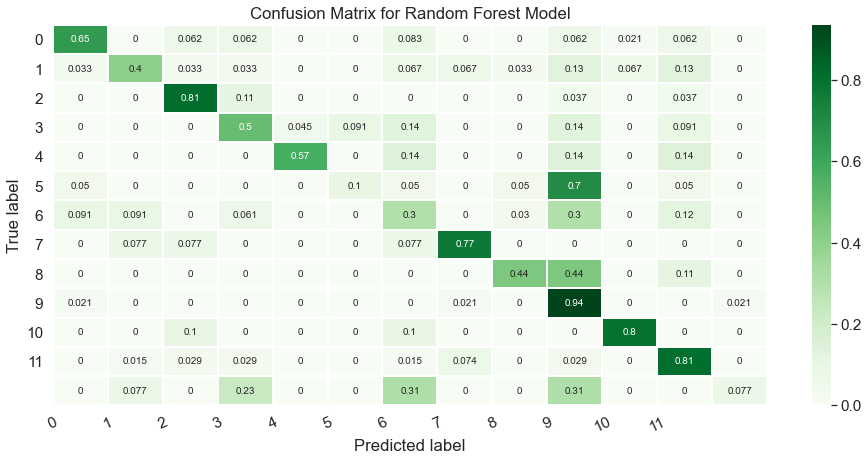

In [17]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = range(12)
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [18]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.84      0.65      0.73        48
           2       0.67      0.40      0.50        30
           3       0.73      0.81      0.77        27
           5       0.44      0.50      0.47        22
           6       0.80      0.57      0.67         7
           7       0.50      0.10      0.17        20
          12       0.36      0.30      0.33        33
          13       0.56      0.77      0.65        13
          15       0.73      0.44      0.55        18
          16       0.47      0.94      0.62        47
          17       0.73      0.80      0.76        10
          19       0.75      0.81      0.78        68
          21       0.50      0.08      0.13        13

    accuracy                           0.61       356
   macro avg       0.62      0.55      0.55       356
weighted avg       0.63      0.61      0.59       356



In [62]:
df['Quote'][0]

' As human beings our greatness lies not so much in being able to remake the world - that is the myth of the atomic age - as in being able to remake ourselves.'

In [61]:
y_train.shape

(830,)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
knn_predictions = knn_classifier.predict(X_test)

In [23]:
knn_classifier.score(X_test, y_test)

0.6067415730337079

In [47]:
type(X_test)

pandas.core.frame.DataFrame

In [64]:
knn_classifier.predict(check)

array([1])

In [24]:
y_test

518     12
196      2
500      7
867     16
1148    21
        ..
45       1
456      7
608     12
979     19
976     19
Name: Image, Length: 356, dtype: int64

In [25]:
y_pred_test = knn_classifier.predict(X_test)

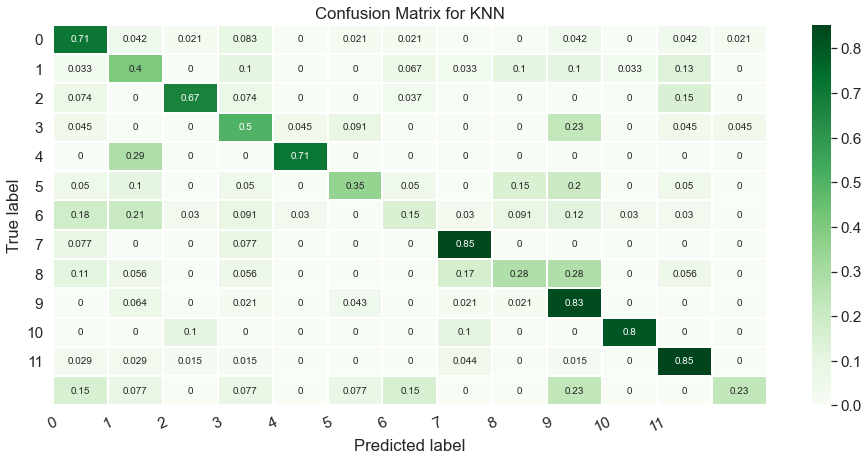

In [26]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = range(12)
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for KNN')
plt.show()